# TSP Quickstart

In this demo, we generate a random 20-city traveling salesperson problem (TSP), collect a tour from a human subject, and then compare it to the optimal tour. For a more thorough example of running a human subject on a whole set of problems and computing statistics, see the [Setting Up a Simple Experiment](experiment_demo.ipynb) notebook.

In [16]:
from tsp.core.tsp import TSP
from tsp.core.viz import visualize_tsp_plt
from tsp.core.save import load_list
from tsp.core.solvers import concorde_solve, pyramid_solve
from tsp.experiment.batch import save_problem_batch
from tsp.experiment.batch_solver import solve_batch
from tsp.experiment.batch_server import batch_server_run

## Generating and Saving a Problem

Generally, the interface for running human subjects on TSPs is designed for use on sets of more than one problem. In this case, we only generate one, and save it in the directory `test`. When saving it, the library automatically labels it with a numerical index. In this case it will be saved in the file `test/001.tsp`.

In [10]:
problem = TSP.generate_random(20)
save_problem_batch([problem], './test')

In [15]:
def pyramid_solve_2_3(problem):
    return pyramid_solve(problem, k=2, s=3)
solve_batch('test/001.tsp', pyramid_solve_2_3, 'examples/test/normal/pyramid_2_3')

[]

## Running a Human Subject

The user interface (UI) for running an experimental subject is served in the web browser. After starting the code in this next cell, navigate to [localhost:8080](http://localhost:8080/) in order to access the UI. The web server should automatically shutdown after you have completed and submitted the problem.

In [ ]:
batch_server_run(problems_path='./test', output_dir='./test', randomized=False)

Serving on http://localhost:8080 ...


## Visualizing Tours

Following are visualizations of the human subject and optimal tours, using the MatPlotLib backend to inline it in the notebook. Also available is a Python Imaging Library (PIL) backend for visualization.

### Human Tour

The UI saved the tour in the same `test` directory as `001.sol`. The following code loads it for visualizing and later to calculate the error relative to the optimal tour.

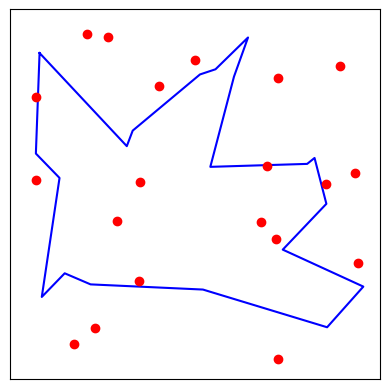

In [ ]:
human_tour = load_list('./test/001.sol')
visualize_tsp_plt(problem, human_tour)

In [ ]:
import os
os.environ["CONCORDE"] = "/Users/liamkennedy/Downloads/concorde"
#put path to executable concorde


### Optimal Tour

The optimal tour is generated using the Concorde backend. It can be used in the same way as the human tour from the UI for visualization and calculation of distance.

In [ ]:
optimal_tour = concorde_solve(problem)
visualize_tsp_plt(problem, optimal_tour)

FileNotFoundError: [Errno 2] No such file or directory: './tsp.sol'

## Computing Distance

The library makes computing the distance of tours easy. There are also helper functions not used here found in `tsp.experiment.batch_solver` to compute more comprehensive statistics for whole sets of problems. It's not really worth it to use them for a single problem.

In [ ]:
human_score = problem.score(human_tour)
optimal_score = problem.score(optimal_tour)
error = (human_score / optimal_score) - 1.

print(f'   Human:  {human_score:.2f}')
print(f'Concorde:  {optimal_score:.2f}')
print(f'   Error:  {error:.2f}')